In [1]:
# ilgili twitter kütüphanlerin eklenmesi
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

In [11]:
#twitter api erişim bilgilerinin girilmesi
consumer_key    = 'rClN9bFec5Znvxrb1yT7on'
consumer_secret = 'pxL5YV26ISVUId1FqkD9ngpSBUN3qMX5oIcM2bgqEIXOuGo'
access_token    = '139501997-rikZmd58umUmkXVOQjjKuwbuz4vSzSyCJUXG7'
access_token_secret = 'bWHAZSbJspuH0wkiU44ZH52LMK0bfUjg2feXQnxLONoym'

In [12]:
import tweepy
# authenticate
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [21]:
search_query = "#messi -filter:retweets"

In [22]:
# get tweets from the API
tweets = tweepy.Cursor(api.search,
              q=search_query,
              lang="en",
              since="2020-09-16").items(500)

# store the API responses in a list
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Total Tweets fetched: 500


In [23]:
import pandas as pd

# intialize the dataframe
tweets_df = pd.DataFrame()

# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)

# show the dataframe
tweets_df.head()

,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,Fra,I'm cozy,"Pretty when I wake up, I'm a bad bitch at brea...",False,2022-12-18 19:25:16,Argentina won 🇦🇷\n#Messi #ArgentinaVsFrance,"[Messi, ArgentinaVsFrance]",Twitter for Android
1,oghenerobo ernest,Nigeria,Everything is achievable,False,2022-12-18 19:25:15,Messi wins a world cup....debate over.....you ...,[messi],Twitter for Android
2,OMEGA 🇧🇩🇵🇸,Mars,"I ask myself, why am I talkin' like this?",False,2022-12-18 19:25:14,Where were you that night when messi finally w...,"[Argentina, Messi]",Twitter for Android
3,Roshan Singh,"कोलकाता, भारत",Law Student | Football is Life | Indian Footba...,False,2022-12-18 19:25:14,Thank you everyone for the support and for bel...,None,Twitter for Android
4,Bobby Sanghavi,,,False,2022-12-18 19:25:14,I see skies of Blue and White\n\n#FIFAWorldCup...,"[FIFAWorldCup, Qatar2022, ArgentinaVsFrance, A...",Twitter for Android


In [24]:
tweets_df['user_name'].value_counts(dropna =False)  

Hidayet Rehberi Kur'an                   12
Bee-One                                   2
Jai Hind Janta 🇮🇳🙏                        2
DINESH DADHICH                            2
The One And Only                          2
                                         ..
J.                                        1
$_CHZ (Chiliz) Coin_$ Investor/Trader     1
Ali Zain                                  1
Mortadha Mohammed                         1
Riju Paul                                 1
Name: user_name, Length: 475, dtype: int64

In [25]:
filtered = tweets_df.groupby('user_name').filter(lambda x: len(x) <= 3)
tweets_df=tweets_df[tweets_df.isin(filtered)]
tweets_df['user_name'].value_counts(dropna =False)

NaN                                      12
Bee-One                                   2
Jai Hind Janta 🇮🇳🙏                        2
DINESH DADHICH                            2
The One And Only                          2
                                         ..
J.                                        1
$_CHZ (Chiliz) Coin_$ Investor/Trader     1
Ali Zain                                  1
Mortadha Mohammed                         1
Riju Paul                                 1
Name: user_name, Length: 475, dtype: int64

In [27]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [30]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 191.

5 recent tweets:

To all of those who have asked, I will not be going to the Inauguration on January 20th.

The 75,000,000 great American Patriots who voted for me, AMERICA FIRST, and MAKE AMERICA GREAT AGAIN, will have a G… https://t.co/D1YuWzkn15

https://t.co/csX07ZVWGe

I am asking for everyone at the U.S. Capitol to remain peaceful. No violence! Remember, WE are the Party of Law &amp; O… https://t.co/XWZnbZWwze

Please support our Capitol Police and Law Enforcement. They are truly on the side of our Country. Stay peaceful!



In [31]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,"To all of those who have asked, I will not be ..."
1,"The 75,000,000 great American Patriots who vot..."
2,https://t.co/csX07ZVWGe
3,I am asking for everyone at the U.S. Capitol t...
4,Please support our Capitol Police and Law Enfo...
5,https://t.co/izItBeFE6G
6,These scoundrels are only toying with the @sen...
7,Even Mexico uses Voter I.D.
8,The States want to redo their votes. They foun...
9,"They just happened to find 50,000 ballots late..."


In [32]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [33]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1347569870578266115
2021-01-08 15:44:28
Twitter for iPhone
612587
76317
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}


In [34]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [35]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,"To all of those who have asked, I will not be ...",88,1347569870578266115,2021-01-08 15:44:28,Twitter for iPhone,612587,76317
1,"The 75,000,000 great American Patriots who vot...",140,1347555316863553542,2021-01-08 14:46:38,Twitter for iPhone,509793,85643
2,https://t.co/csX07ZVWGe,23,1347334804052844550,2021-01-08 00:10:24,Twitter Media Studio,630703,126502
3,I am asking for everyone at the U.S. Capitol t...,144,1346912780700577792,2021-01-06 20:13:26,Twitter for iPhone,695386,134759
4,Please support our Capitol Police and Law Enfo...,112,1346904110969315332,2021-01-06 19:38:58,Twitter for iPhone,533685,87498
5,https://t.co/izItBeFE6G,23,1346891760174329859,2021-01-06 18:49:54,Twitter for iPhone,208586,40844
6,These scoundrels are only toying with the @sen...,140,1346845109736845318,2021-01-06 15:44:31,Twitter for iPhone,189788,32848
7,Even Mexico uses Voter I.D.,27,1346822958006886400,2021-01-06 14:16:30,Twitter for iPhone,393123,53319
8,The States want to redo their votes. They foun...,130,1346822610957561858,2021-01-06 14:15:07,Twitter for iPhone,233496,40847
9,"They just happened to find 50,000 ballots late...",140,1346818855298072576,2021-01-06 14:00:12,Twitter for iPhone,292306,56791


In [36]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 97.6020942408377


In [37]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
I am asking for everyone at the U.S. Capitol to remain peaceful. No violence! Remember, WE are the Party of Law &amp; O… https://t.co/XWZnbZWwze
Number of likes: 695386
144 characters.

The tweet with more retweets is: 
I am asking for everyone at the U.S. Capitol to remain peaceful. No violence! Remember, WE are the Party of Law &amp; O… https://t.co/XWZnbZWwze
Number of retweets: 134759
144 characters.



In [38]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

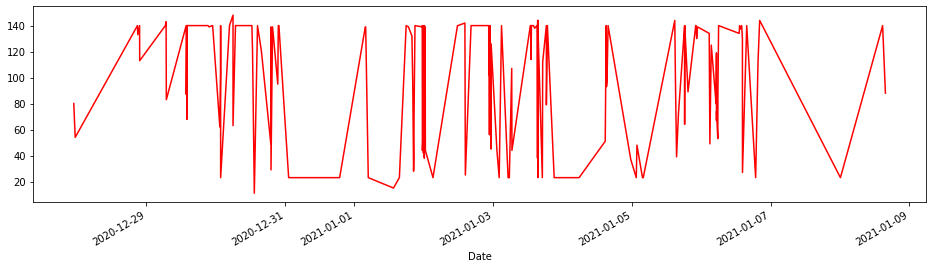

In [39]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

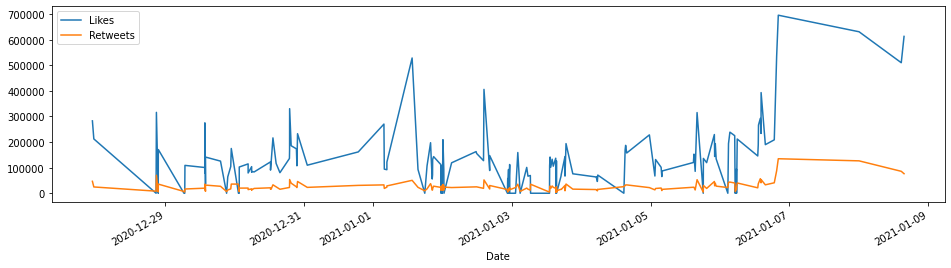

In [40]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [41]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter Media Studio


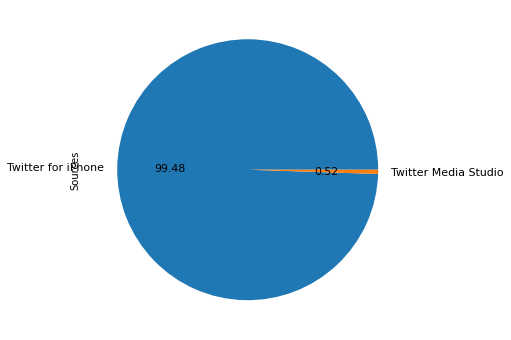

In [42]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [43]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [44]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,"To all of those who have asked, I will not be ...",88,1347569870578266115,2021-01-08 15:44:28,Twitter for iPhone,612587,76317,0
1,"The 75,000,000 great American Patriots who vot...",140,1347555316863553542,2021-01-08 14:46:38,Twitter for iPhone,509793,85643,1
2,https://t.co/csX07ZVWGe,23,1347334804052844550,2021-01-08 00:10:24,Twitter Media Studio,630703,126502,0
3,I am asking for everyone at the U.S. Capitol t...,144,1346912780700577792,2021-01-06 20:13:26,Twitter for iPhone,695386,134759,1
4,Please support our Capitol Police and Law Enfo...,112,1346904110969315332,2021-01-06 19:38:58,Twitter for iPhone,533685,87498,1
5,https://t.co/izItBeFE6G,23,1346891760174329859,2021-01-06 18:49:54,Twitter for iPhone,208586,40844,0
6,These scoundrels are only toying with the @sen...,140,1346845109736845318,2021-01-06 15:44:31,Twitter for iPhone,189788,32848,1
7,Even Mexico uses Voter I.D.,27,1346822958006886400,2021-01-06 14:16:30,Twitter for iPhone,393123,53319,0
8,The States want to redo their votes. They foun...,130,1346822610957561858,2021-01-06 14:15:07,Twitter for iPhone,233496,40847,1
9,"They just happened to find 50,000 ballots late...",140,1346818855298072576,2021-01-06 14:00:12,Twitter for iPhone,292306,56791,-1


In [45]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [46]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 37.17277486910995%
Percentage of neutral tweets: 49.738219895287955%
Percentage de negative tweets: 13.089005235602095%
